In [7]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# -------------------------
# Step 1: Fetch Data from OpenWeatherMap API
# -------------------------

In [9]:
# API Key
api_key = "c5b75be08b7631af05b03478a7be5c47"
city = "Delhi"
url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"

In [10]:
# Send API request
response = requests.get(url)


Fetched Weather Data:
     City  Temperature (°C)  Humidity (%)  Pressure (hPa)           Weather
0  Delhi             42.66             8             999  scattered clouds


C:\Users\admin\AppData\Local\Temp\ipykernel_14700\4172657114.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Temperature", "Humidity", "Pressure"], y=[df.iloc[0, 1], df.iloc[0, 2], df.iloc[0, 3]], palette="coolwarm")


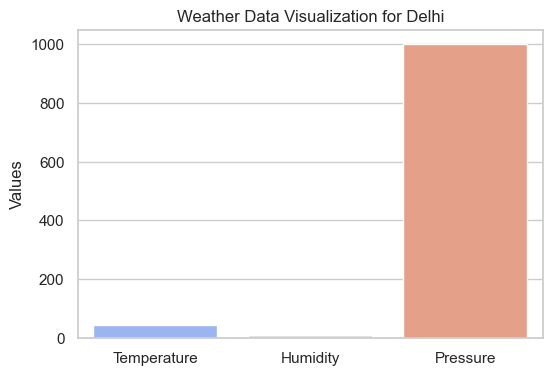

In [26]:

# Check if request was successful
if response.status_code == 200:
    data = response.json()

    # Extract relevant information
    weather_info = {
        "City": city,
        "Temperature (°C)": data["main"]["temp"],
        "Humidity (%)": data["main"]["humidity"],
        "Pressure (hPa)": data["main"]["pressure"],
        "Weather": data["weather"][0]["description"]
    }

    # Convert to DataFrame
    df = pd.DataFrame([weather_info])

    print("\nFetched Weather Data:\n", df)
      # -------------------------
    # Step 2: Visualize Data
    # -------------------------

    # Set theme
    sns.set_theme(style="whitegrid")

    # Create a bar plot
    plt.figure(figsize=(6, 4))
    sns.barplot(x=["Temperature", "Humidity", "Pressure"], y=[df.iloc[0, 1], df.iloc[0, 2], df.iloc[0, 3]], palette="coolwarm")
    plt.title(f"Weather Data Visualization for {city}")
    plt.ylabel("Values")
    plt.show()

else:
    print("Failed to retrieve data. Check your API key or city name.")


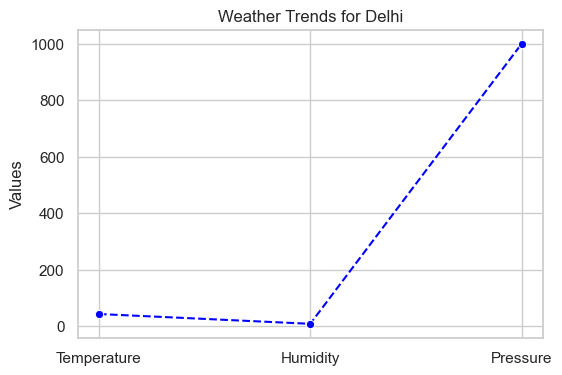

In [27]:
plt.figure(figsize=(6, 4))
sns.lineplot(x=["Temperature", "Humidity", "Pressure"], 
             y=[df.iloc[0, 1], df.iloc[0, 2], df.iloc[0, 3]], 
             marker="o", linestyle="--", color="blue")
plt.title(f"Weather Trends for {city}")
plt.ylabel("Values")
plt.show()

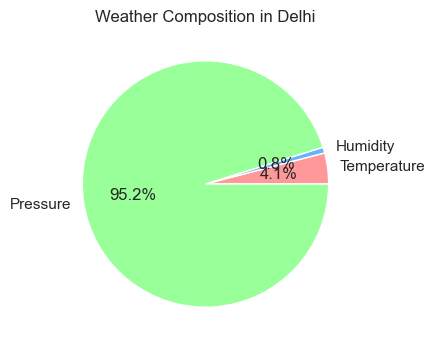

In [29]:
plt.figure(figsize=(6, 4))
plt.pie([df.iloc[0, 1], df.iloc[0, 2], df.iloc[0, 3]], 
        labels=["Temperature", "Humidity", "Pressure"], 
        autopct="%1.1f%%", colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title(f"Weather Composition in {city}")
plt.show()